In [1]:
# ---- Reproducibility
import random
import torch

#seed = 1234
#random.seed(seed)
#torch.manual_seed(seed)
#if torch.cuda.is_available():
#    torch.cuda.manual_seed_all(seed)


In [2]:


# ---- Parameters
n, p = 50, 40
noise_std = 0.1

# (Optional) choose device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---- Data generation (PyTorch)
# Use float64 to mirror NumPy defaults
u = torch.rand(n, dtype=torch.float64, device=device)          # length n
v = torch.rand(p, dtype=torch.float64, device=device)          # length p

# Rank-1 matrix via outer product
rank_1_matrix = torch.outer(u, v)                              # (n, p)

# Homoscedastic Gaussian noise
noise = noise_std * torch.randn(n, p, dtype=torch.float64, device=device)

noisy_matrix = rank_1_matrix + noise

# ---- Print (move to CPU for readability if needed)
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix.cpu().numpy())

print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix.cpu().numpy())


Rank-1 Matrix (Outer Product):
[[0.29856102 0.47723595 0.1694718  ... 0.40728906 0.58823851 0.83807294]
 [0.01509014 0.0241209  0.0085656  ... 0.02058558 0.02973129 0.04235865]
 [0.21238061 0.33948055 0.12055332 ... 0.28972401 0.41844194 0.596161  ]
 ...
 [0.16397331 0.26210374 0.09307595 ... 0.22368806 0.32306768 0.46027976]
 [0.06629869 0.10597538 0.03763304 ... 0.09044292 0.13062469 0.18610311]
 [0.14950463 0.23897621 0.08486311 ... 0.20395026 0.29456082 0.41966557]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.51235043  0.62322903  0.16445627 ...  0.40037446  0.80504206
   0.87014593]
 [ 0.13090078  0.07052829  0.08243715 ... -0.04394979  0.00279262
   0.17054087]
 [ 0.13626591  0.22588915  0.16582707 ...  0.25438736  0.4766231
   0.49728315]
 ...
 [-0.00658778  0.26222238  0.20375519 ...  0.16396533  0.32742232
   0.44738204]
 [ 0.01411522  0.03007953 -0.15498346 ...  0.0229107  -0.1080751
   0.14577362]
 [ 0.12719157  0.20522485  0.15930575 ...  0.15528008  0.19551796
   0.4314

In [3]:
import sys
import os
import matplotlib.pyplot as plt
from cebmf_torch import cEBMF

In [4]:
mycebmf=  cEBMF(data= noisy_matrix, prior_F="point_exp",
                prior_L="point_exp") 

 

In [5]:
mycebmf.initialize()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])

tensor([ 0.1467, -0.2370, -0.3468, -0.0674, -0.0636, -0.0741,  0.0315,  0.2499,
         0.1439,  0.1814,  0.2403, -0.4762,  0.1635, -0.1883, -0.3772, -0.0605,
        -0.0419, -0.1641, -0.1603,  0.1631,  0.1707,  0.1854, -0.1623, -0.1733,
        -0.1048,  0.0363, -0.1417,  0.0900, -0.1459, -0.0539,  0.0728, -0.0017,
         0.2664,  0.1499,  0.3405, -0.1353, -0.3752,  0.0884, -0.3174, -0.0854,
         0.0170,  0.0464,  0.0070, -0.1606,  0.0827,  0.0305,  0.0382,  0.0069,
         0.0508, -0.1673])
tensor([-0.0221,  0.0354, -0.3110, -0.2554,  0.1515, -0.0507, -0.1035, -0.0623,
         0.2215,  0.3219,  0.1676, -0.0815,  0.2777,  0.0116,  0.0168,  0.0267,
        -0.0611, -0.0137, -0.0450,  0.0340,  0.0899, -0.1296, -0.1043, -0.1878,
         0.0993, -0.0791, -0.1627,  0.1542, -0.2431,  0.0213,  0.0478,  0.0238,
        -0.0150, -0.2156, -0.1606, -0.1712,  0.3648, -0.0209,  0.2968, -0.0145])


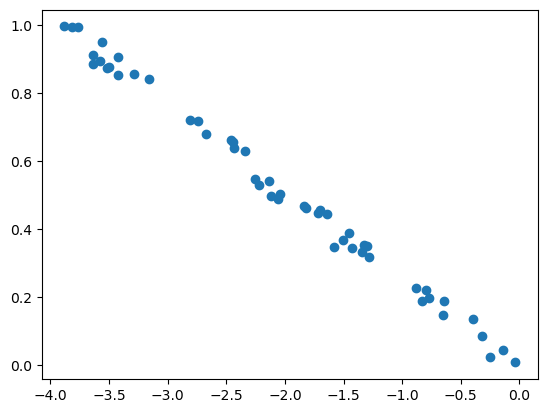

In [6]:
plt.scatter( mycebmf.L[:,0],u)

In [7]:
mycebmf.iter_once()
mycebmf.update_fitted_value()
import numpy as np
K=0
mycebmf.Y_fit 

5


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

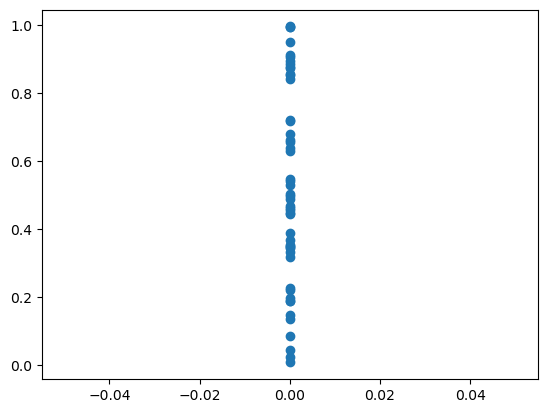

In [8]:
plt.scatter( mycebmf.L[:,0],u)

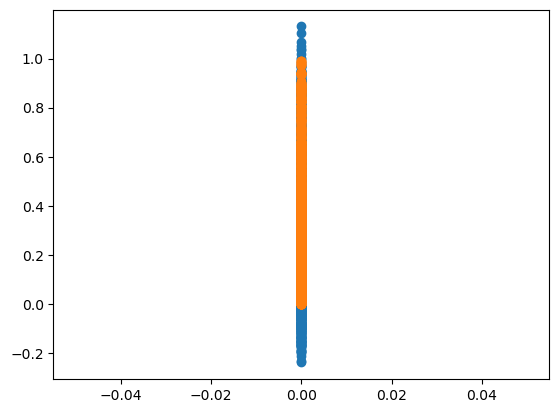

In [9]:
mycebmf.iter_once()  
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

In [10]:
mycebmf.fit()

CEBMFResult(L=tensor([[4.8691],
        [0.2072],
        [3.1274],
        [2.0142],
        [3.2943],
        [0.8605],
        [2.1090],
        [3.2629],
        [1.7680],
        [0.8701],
        [1.7889],
        [0.5231],
        [3.6609],
        [4.8638],
        [3.7604],
        [2.4594],
        [1.1106],
        [4.5847],
        [3.2548],
        [3.5741],
        [4.7636],
        [5.0349],
        [1.7146],
        [0.1244],
        [1.7318],
        [2.2961],
        [4.2259],
        [2.2720],
        [2.8337],
        [4.7010],
        [3.0102],
        [4.6893],
        [2.4292],
        [0.3280],
        [4.7923],
        [0.4268],
        [2.7338],
        [5.1073],
        [1.1763],
        [1.0578],
        [1.9088],
        [4.3993],
        [2.8575],
        [1.9387],
        [2.9744],
        [4.5842],
        [5.1931],
        [2.7536],
        [1.0297],
        [2.1926]]), F=tensor([[0.0636],
        [0.1039],
        [0.0318],
        [0.0270],
        [0

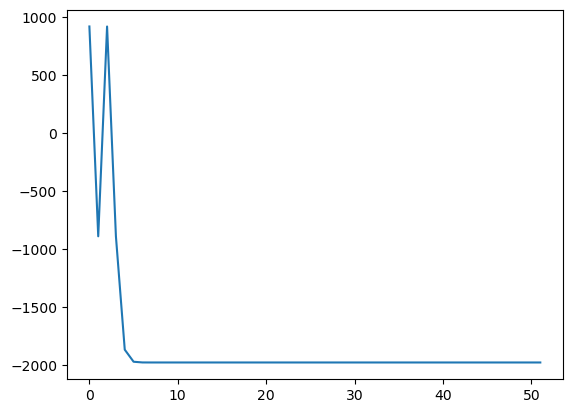

In [11]:
plt.plot(mycebmf.obj)

tensor(0.2868, dtype=torch.float64)

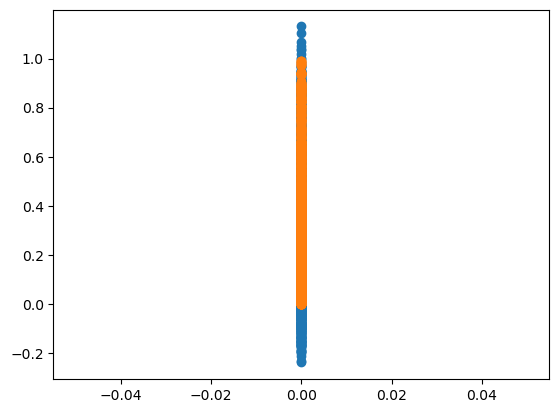

In [12]:
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
torch.sqrt(torch.mean(mycebmf.Y_fit- rank_1_matrix)**2)

In [ ]:
results =[]
for i in range(50):
    # Parameters
    n, p = 50, 40
    noise_std = 0.1

# (Optional) choose device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---- Data generation (PyTorch)
# Use float64 to mirror NumPy defaults
    u = torch.rand(n, dtype=torch.float64, device=device)          # length n
    v = torch.rand(p, dtype=torch.float64, device=device)          # length p

# Rank-1 matrix via outer product
    rank_1_matrix = torch.outer(u, v)                              # (n, p)

# Homoscedastic Gaussian noise
    noise = noise_std * torch.randn(n, p, dtype=torch.float64, device=device)

    noisy_matrix = rank_1_matrix + noise

 
# Add homoscedastic Gaussian noise (constant variance across the matrix)
    mycebmf=  cEBMF(data= noisy_matrix,prior_L="point_exp",
                    prior_F="point_exp") 
    mycebmf.initialize()
    mycebmf.fit()
    
    mycebmf.update_fitted_value()
    
    rr = torch.sqrt(torch.mean(mycebmf.Y_fit- rank_1_matrix)**2)
    results.append( rr)
 

5
2
5
5
3
5
4
5
5
2
5
3
5
3
5
2
5
4
5
4
5
4
5
4
5
5
5
2
5
5
5
4


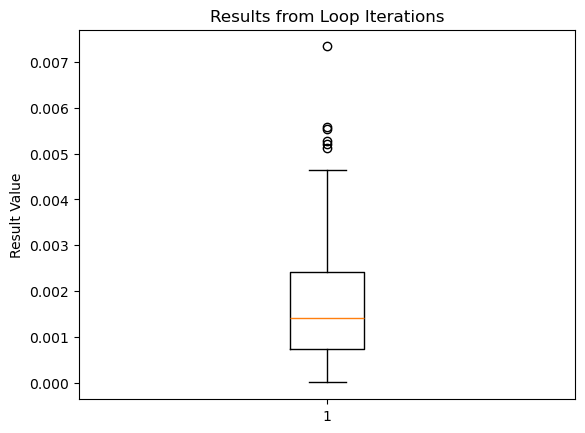

In [ ]:
plt.boxplot(results)
plt.title("Results from Loop Iterations")
plt.ylabel("Result Value")
plt.show()

In [ ]:
res= np.asarray(results)
np.mean(res )

0.0017063547087677897

In [ ]:
mycebmf.obj

[498.4504699707031,
 -894.3434448242188,
 -1897.7318115234375,
 -2013.838623046875,
 -2020.5509033203125,
 -2020.8548583984375,
 -2020.8681640625,
 -2020.868896484375,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.86901855468